In [1]:
!pip install keras

!pip install keras


## Importing required libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import tkinter
from sklearn.metrics import accuracy_score
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")
%matplotlib inline

## Importing the dataset

In [3]:
dataset =  pd.read_csv("PS_20174392719_1491204439457_log-1.csv")

In [4]:
dataset.shape

(6362620, 11)

## Understanding the properties of the dataset

In [5]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Checking for NULL values

In [8]:
print('Null Values =',dataset.isnull().values.any())

Null Values = False


## Removing duplicate rows

In [9]:
dataset = dataset.drop_duplicates(keep='first').copy()
dataset.shape

(6362620, 11)

## Plotting a heat map to visualize the relation between features

<AxesSubplot:title={'center':'correlation of transaction features'}>

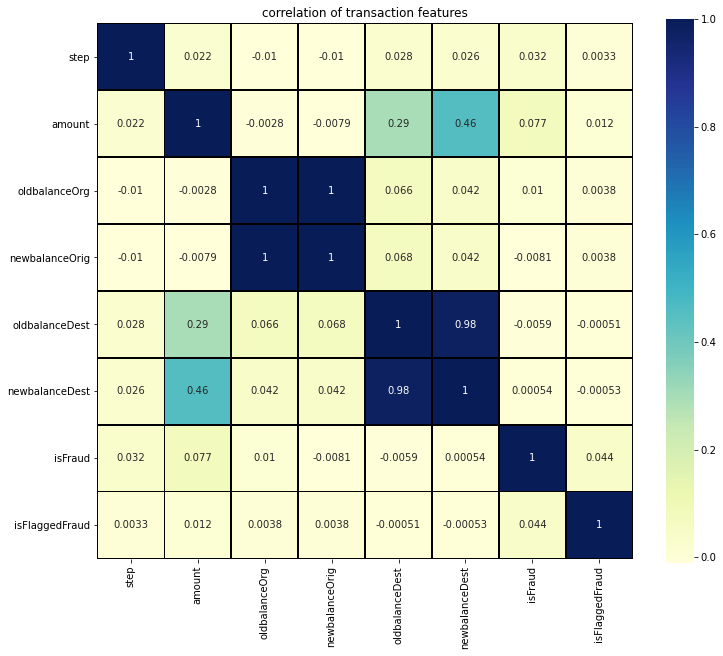

In [10]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('correlation of transaction features')

sns.heatmap(dataset.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)



## Sorting numberical variable based on the dependency of the class label

In [11]:
dataset.corr()['isFraud'].sort_values(ascending=False) 

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

## Visualizing non-numeric data with scatter plot

<AxesSubplot:xlabel='type', ylabel='isFraud'>

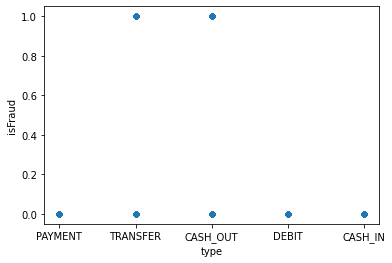

In [12]:
dataset.plot.scatter(x='type', y='isFraud')

## Feature Selection

In [13]:
dataset.drop('nameOrig', axis=1, inplace=True)
dataset.drop('nameDest', axis=1, inplace=True)
dataset.drop('oldbalanceDest', axis=1, inplace=True)
dataset.drop('newbalanceOrig', axis=1, inplace=True)


In [52]:
dataset.head()

,step,type,amount,oldbalanceOrg,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,0.0,0,0


## One - hot encoding

In [14]:
dum = pd.get_dummies(dataset['type'])
dataset_encoded = pd.concat([dataset,dum],axis=1)
dataset_encoded.drop(['type'],axis=1, inplace=True)
dataset_encoded

,step,amount,oldbalanceOrg,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,21249.00,0.00,0,0,0,0,0,1,0
2,1,181.00,181.00,0.00,1,0,0,0,0,0,1
3,1,181.00,181.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,41554.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,6311409.28,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,1,0,0,0,0,0,1


## Checking if target class is balanced or not

0    19980
1       20
Name: isFraud, dtype: int64


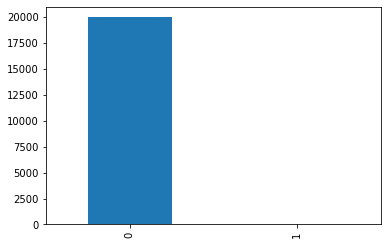

In [15]:
dataset_balanced = dataset_encoded.sample(n=20000)
dataset_balanced.isFraud.value_counts().plot.bar()
print(dataset_balanced.isFraud.value_counts())

## Separating class label from the data set

In [16]:
x=dataset_balanced.drop(['isFraud'],axis=1)
y=dataset_balanced['isFraud']

In [17]:
x.head(10)

,step,amount,oldbalanceOrg,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1521348,153,48255.84,0.00,330194.60,0,0,1,0,0,0
5056560,354,145061.60,0.00,409273.75,0,0,1,0,0,0
3828148,282,412296.38,7706449.39,254644.73,0,1,0,0,0,0
4381170,311,232139.35,97944.94,781945.33,0,1,0,0,0,0
2632596,209,193882.54,0.00,2281196.90,0,0,1,0,0,0
4831152,347,23252.36,4891957.10,231392.11,0,1,0,0,0,0
3074922,235,132600.84,8845.00,1181271.57,0,1,0,0,0,0
6280279,644,150852.95,277.00,674842.27,0,1,0,0,0,0
301532,15,120832.36,4828.00,381649.95,0,0,1,0,0,0
4353626,309,39541.96,85952.00,13906152.91,0,0,1,0,0,0


In [18]:
x.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceDest', 'isFlaggedFraud',
       'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype='object')

In [19]:
y.head()

1521348    0
5056560    0
3828148    0
4381170    0
2632596    0
Name: isFraud, dtype: int64

## Splitting the data set into training and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

## Sampling to balance the target class

In [21]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))


print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))



sm = SMOTE(random_state=10, sampling_strategy= 1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, the shape of train_X: (14000, 10)
Before OverSampling, the shape of train_y: (14000,) 

Before OverSampling, counts of label '1': 11
Before OverSampling, counts of label '0': 13989 

After OverSampling, the shape of train_X: (27978, 10)
After OverSampling, the shape of train_y: (27978,) 

After OverSampling, counts of label '1': 13989
After OverSampling, counts of label '0': 13989


## Normalization

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_res)
x_test_scaled = sc.transform(X_test)

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
logisticRegg=LogisticRegression()
logisticRegg.fit(x_train_scaled, y_train_res)

LogisticRegression()

### Accuracy

In [24]:
preds=logisticRegg.predict(x_test_scaled)
print('accuracy with Logistic Regression:',accuracy_score(y_test, preds)*100, '%')

accuracy with Logistic Regression: 94.69999999999999 %


### Root mean Squared Error

In [25]:
import sklearn.metrics as metrics
preds = logisticRegg.predict(x_test_scaled)
rmsle=metrics.mean_squared_log_error(y_test, preds)
#rmsle = np.sqrt(mean_squared_log_error(y_test, preds))
rmsle

0.025464009737664668

### Confusion Matrix

In [26]:
print('Confusion matrix', '\n', confusion_matrix(y_test, preds), '\n')
print('Classification report', '\n', classification_report(y_test, preds), '\n')

Confusion matrix 
 [[5674  317]
 [   1    8]] 

Classification report 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      5991
           1       0.02      0.89      0.05         9

    accuracy                           0.95      6000
   macro avg       0.51      0.92      0.51      6000
weighted avg       1.00      0.95      0.97      6000
 



# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
decTree=DecisionTreeClassifier()
decTree.fit(x_train_scaled, y_train_res)

DecisionTreeClassifier()

## Acuracy

In [28]:
preds=decTree.predict(x_test_scaled)
print('accuracy with Decision Tree:',accuracy_score(y_test, preds)*100, '%')

accuracy with Decision Tree: 99.41666666666666 %


### Root Mean Square Error

In [29]:
preds = decTree.predict(x_test_scaled)
rmsle=metrics.mean_squared_log_error(y_test, preds)
#rmsle = np.sqrt(mean_squared_log_error(y_test, preds))
rmsle

0.002802642581189508

### Confusion Matrix

In [30]:
print('Confusion matrix', '\n', confusion_matrix(y_test, preds), '\n')
print('Classification report', '\n', classification_report(y_test, preds), '\n')

Confusion matrix 
 [[5961   30]
 [   5    4]] 

Classification report 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5991
           1       0.12      0.44      0.19         9

    accuracy                           0.99      6000
   macro avg       0.56      0.72      0.59      6000
weighted avg       1.00      0.99      1.00      6000
 



## Random Forest Algorithm

In [31]:
from sklearn.ensemble import RandomForestClassifier
randF=RandomForestClassifier()
randF.fit(x_train_scaled, y_train_res)

RandomForestClassifier()

## Accuracy

In [32]:
preds=randF.predict(x_test_scaled)
print('accuracy with Random Forest:',accuracy_score(y_test, preds)*100, '%')

accuracy with Random Forest: 99.68333333333334 %


## Root Mean Square Error

In [33]:
preds = randF.predict(x_test_scaled)
rmsle=metrics.mean_squared_log_error(y_test, preds)
#rmsle = np.sqrt(mean_squared_log_error(y_test, preds))
rmsle

0.0015214345440743044

## Cofusion Matrix

In [34]:
print('Confusion matrix', '\n', confusion_matrix(y_test, preds), '\n')
print('Classification report', '\n', classification_report(y_test, preds), '\n')

Confusion matrix 
 [[5976   15]
 [   4    5]] 

Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5991
           1       0.25      0.56      0.34         9

    accuracy                           1.00      6000
   macro avg       0.62      0.78      0.67      6000
weighted avg       1.00      1.00      1.00      6000
 



## Neural Networks

In [35]:
''' Initializing the model '''

model = Sequential()

''' Adding the input layer and the first hidden layer '''

model.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_shape=(None,10)))

''' Adding the second hidden layer '''

model.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))

''' Adding the output layer '''

model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

''' Compiling and fitting the model '''

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_info = model.fit(x_train_scaled, y_train_res, batch_size = 10, epochs = 10)

Epoch 1/10
2798/2798 [==============================] - 5s 1ms/step - loss: 0.4065 - accuracy: 0.8158
Epoch 2/10
2798/2798 [==============================] - 4s 1ms/step - loss: 0.1720 - accuracy: 0.9176
Epoch 3/10
2798/2798 [==============================] - 3s 1ms/step - loss: 0.1513 - accuracy: 0.9355
Epoch 4/10
2798/2798 [==============================] - 4s 1ms/step - loss: 0.1375 - accuracy: 0.9425
Epoch 5/10
2798/2798 [==============================] - 4s 1ms/step - loss: 0.1291 - accuracy: 0.9484
Epoch 6/10
2798/2798 [==============================] - 4s 1ms/step - loss: 0.1238 - accuracy: 0.9550
Epoch 7/10
2798/2798 [==============================] - 4s 1ms/step - loss: 0.1180 - accuracy: 0.9575
Epoch 8/10
2798/2798 [==============================] - 4s 1ms/step - loss: 0.1052 - accuracy: 0.9627
Epoch 9/10
2798/2798 [==============================] - 4s 1ms/step - loss: 0.0988 - accuracy: 0.9664
Epoch 10/10
2798/2798 [==============================] - 4s 1ms/step - loss: 0.089

## Accuracy

In [36]:
y_pred = model.predict_classes(x_test_scaled)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',round(acc,2))

Accuracy: 96.25


## Root Mean Square Error

In [37]:
rmsle=metrics.mean_squared_log_error(y_test, y_pred)
#rmsle = np.sqrt(mean_squared_log_error(y_test, preds))
rmsle

0.01801698802193255

## Confusion Matrix

In [38]:
print('Confusion matrix', '\n', confusion_matrix(y_test, y_pred), '\n')
print('Classification report', '\n', classification_report(y_test, y_pred), '\n')

Confusion matrix 
 [[5769  222]
 [   3    6]] 

Classification report 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      5991
           1       0.03      0.67      0.05         9

    accuracy                           0.96      6000
   macro avg       0.51      0.81      0.52      6000
weighted avg       1.00      0.96      0.98      6000
 



In [39]:
dataset.loc[6362618]

step                    743
type               TRANSFER
amount            850002.52
oldbalanceOrg     850002.52
newbalanceDest          0.0
isFraud                   1
isFlaggedFraud            0
Name: 6362618, dtype: object

## Final Prediction

In [40]:
x_new=np.reshape(np.asarray([743,850002.52,850002.52,0.00,0,0,0,0,0,1]),(1,10))
#x_new_scaled = sc.fit_transform(x_new)
y_pred = model.predict_classes(x_new)
print(y_pred)
if y_pred==1:
    print("Transaction done is fraudulant")
else:
    print("No Money Laundering!")

[[1]]
Transaction done is fraudulant


In [41]:
dataset.loc[935174]

step                     43
type                CASH_IN
amount            122554.67
oldbalanceOrg     570439.06
newbalanceDest    350914.56
isFraud                   0
isFlaggedFraud            0
Name: 935174, dtype: object

In [42]:
x_new=np.reshape(np.asarray([43,122554.67,570439.06, 350914.56,0,1,0,0,0,0]),(1,10))
#x_new_scaled = sc.fit_transform(x_new)
y_pred = model.predict_classes(x_new)
print(y_pred)
if y_pred==1:
    print("Transaction done is fraudulant")
else:
    print("No Money Laundering!")

[[0]]
No Money Laundering!


In [44]:
dataset.loc[10000]

step                        7
type                 TRANSFER
amount               929560.4
oldbalanceOrg       150562.57
newbalanceDest    15128076.87
isFraud                     0
isFlaggedFraud              0
Name: 10000, dtype: object

In [45]:
x_new=np.reshape(np.asarray([7,929560.4,150562.57, 15128076.87,0,0,0,0,0,1]),(1,10))
#x_new_scaled = sc.fit_transform(x_new)
y_pred = model.predict_classes(x_new)
print(y_pred)
if y_pred==1:
    print("Transaction done is fraudulant")
else:
    print("No Money Laundering!")

[[0]]
No Money Laundering!


In [49]:
dataset.loc[200000]

step                     13
type               CASH_OUT
amount            170910.69
oldbalanceOrg       50508.0
newbalanceDest    809772.69
isFraud                   0
isFlaggedFraud            0
Name: 200000, dtype: object

In [50]:
x_new=np.reshape(np.asarray([13,170910.69,50508.0,809772.69,0,0,1,0,0,0]),(1,10))
#x_new_scaled = sc.fit_transform(x_new)
y_pred = model.predict_classes(x_new)
print(y_pred)
if y_pred==1:
    print("Transaction done is fraudulant")
else:
    print("No Money Laundering!")

[[0]]
No Money Laundering!


In [ ]:
from tkinter import *
fields = ('step','amount','oldbalanceOrg','newbalanceDest','isFlaggedFraud','CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER','Type_of_transaction')
def type_of_transaction(entries):
    st = (float(entries['step'].get()) / 100) / 12
    amnt = float(entries['amount'].get())
    oldbal = float(entries['oldbalanceOrg'].get())
    newbal = float(entries['newbalanceDest'].get())
    flag = float(entries['isFlaggedFraud'].get())
    cin = float(entries['CASH_IN'].get())
    cout = float(entries['CASH_OUT'].get())
    dbt = float(entries['DEBIT'].get())
    paymnt = float(entries['PAYMENT'].get())
    trans = float(entries['TRANSFER'].get())
    x_new=np.reshape(np.asarray([st,amnt,oldbal,newbal,flag,cin,cout,dbt,paymnt,trans]),(1,10))
    y_pred = model.predict_classes(x_new)
    print(y_pred)
    entries['Type_of_transaction'].delete(0,END)
    if y_pred==1:
        entries['Type_of_transaction'].insert(0,"The transaction done is Fraudlent!!")
    else:
        entries['Type_of_transaction'].insert(0,"No Money Laundering!!!!")
def makeform(root, fields):
    entries = {}
    for field in fields:
        row = Frame(root)
        lab = Label(row, width=22, text=field+": ", anchor='w')
        ent = Entry(row)
        ent.insert(0,"0")
        row.pack(side = TOP, fill = X, padx = 5 , pady = 10)
        lab.pack(side = LEFT)
        ent.pack(side = RIGHT, expand = YES, fill = X)
        entries[field] = ent
    return entries
root = Tk()
root.title("Money Laundering Detection")
ents = makeform(root, fields)
root.bind('<Return>', (lambda event, e = ents: fetch(e)))
b1 = Button(root, text = 'Identify the type of Transaction',command=(lambda e = ents: type_of_transaction(e)))
b1.pack(side = LEFT, padx = 5, pady = 5)
root.mainloop()

[[0]]
[[0]]
